In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import subreddit data seperately
se = pd.read_csv('../data/SoftwareEngineering.csv')
ds = pd.read_csv('../data/datascience.csv')

In [3]:
se.head()

,selftext,title,subreddit
0,I recently dropped out of college from a nursi...,Will coding boot camps help me get a job in te...,SoftwareEngineering
1,NaN,Maybe people do care about performance and rel...,SoftwareEngineering
2,"Hey everyone,\n\nI've been wondering if there'...",Is there a way to have dynamic types between l...,SoftwareEngineering
3,what are the public spanish universities that ...,spanish universities,SoftwareEngineering
4,"So I am building an app like omegle, and I was...",Small question about users for a product.,SoftwareEngineering


In [4]:
ds.head()

,selftext,title,subreddit
0,Que me pueden contar estoy estudiando con Cour...,Data science,datascience
1,[removed],Master degree gpa,datascience
2,"I'm hosting a free workshop this Friday, 11am-...",For those of you unsure of how to apply techni...,datascience
3,Im about to graduate this quarter w a Stats an...,Career Advice,datascience
4,"Hey, Is there anyone here whos familiar with t...",MS data analytics at Yeshiva university,datascience


In [5]:
# Combine two subreddits
df = pd.concat([se, ds], axis = 0, ignore_index = True)

In [6]:
df

,selftext,title,subreddit
0,I recently dropped out of college from a nursi...,Will coding boot camps help me get a job in te...,SoftwareEngineering
1,NaN,Maybe people do care about performance and rel...,SoftwareEngineering
2,"Hey everyone,\n\nI've been wondering if there'...",Is there a way to have dynamic types between l...,SoftwareEngineering
3,what are the public spanish universities that ...,spanish universities,SoftwareEngineering
4,"So I am building an app like omegle, and I was...",Small question about users for a product.,SoftwareEngineering
...,...,...,...
11989,NaN,AI-generated poetry about data science,datascience
11990,[deleted],I just accepted an offer for a Data Science po...,datascience
11991,NaN,Now get all official and unofficial code imple...,datascience
11992,Does such a thing exist? I am not a data scien...,Poor mans saas hosted Alteryx?,datascience


In [7]:
# Consider each title or selftext as an individual document
df_selftext = df.copy()[['selftext', 'subreddit']]
df_title = df.copy()[['title', 'subreddit']]

In [8]:
df_selftext.rename(columns = {'selftext': 'text'}, inplace = True)

In [9]:
df_title.rename(columns = {'title': 'text'}, inplace = True)

In [10]:
data = pd.concat([df_selftext, df_title], axis = 0, ignore_index = True)

In [11]:
data

,text,subreddit
0,I recently dropped out of college from a nursi...,SoftwareEngineering
1,NaN,SoftwareEngineering
2,"Hey everyone,\n\nI've been wondering if there'...",SoftwareEngineering
3,what are the public spanish universities that ...,SoftwareEngineering
4,"So I am building an app like omegle, and I was...",SoftwareEngineering
...,...,...
23983,AI-generated poetry about data science,datascience
23984,I just accepted an offer for a Data Science po...,datascience
23985,Now get all official and unofficial code imple...,datascience
23986,Poor mans saas hosted Alteryx?,datascience


In [12]:
# Check if there is missing value
data.isnull().sum()

text         2494
subreddit       0
dtype: int64

In [13]:
# Delete rows with missing values
data.dropna(inplace = True)

In [14]:
data.isnull().sum()

text         0
subreddit    0
dtype: int64

In [15]:
# Check duplicated value
data.duplicated().sum()

6814

In [16]:
# Delete duplicated value
data.drop_duplicates(inplace = True)

In [17]:
data.duplicated().sum()

0

In [18]:
data.shape

(14680, 2)

In [19]:
data['text'].value_counts()

career advice                                                                                                   2
Unproductive work meetings                                                                                      2
I need help                                                                                                     2
How to Master Python Fast and Easy: A Complete Simple tutorial Based on the Official Documentation of Python    2
Attend Free Online Demo On Full Stack Data Science and AI By Mr. K.V.Rao                                        2
                                                                                                               ..
Seeking tech stack advice for medial apps                                                                       1
[Question] What was the biggest challenge you faced when switching to remote work?                              1
The Best Engineers Think Like Investors, Not Builders                                   

In [20]:
# Delete rows with text "[deleted]"
data = data[data['text'] != "[deleted]"]

In [21]:
# Delete rows with text "[removed]"
data = data[data['text'] != "[removed]"]

In [22]:
data['text'].value_counts()

career advice                                                                                                   2
Unproductive work meetings                                                                                      2
I need help                                                                                                     2
Attend Free Online Demo On Full Stack Data Science and AI By Mr. K.V.Rao                                        2
How to Master Python Fast and Easy: A Complete Simple tutorial Based on the Official Documentation of Python    2
                                                                                                               ..
Seeking tech stack advice for medial apps                                                                       1
[Question] What was the biggest challenge you faced when switching to remote work?                              1
The Best Engineers Think Like Investors, Not Builders                                   

In [23]:
# Check target varaible
data['subreddit'].value_counts()

datascience            7993
SoftwareEngineering    6682
u_Learn-datascience       1
Name: subreddit, dtype: int64

In [24]:
# Drop rows with subreddit "u_Learn-datascience"
data = data[data['subreddit'] != 'u_Learn-datascience']

In [25]:
data['subreddit'].value_counts(normalize = True)

datascience            0.544668
SoftwareEngineering    0.455332
Name: subreddit, dtype: float64

In [26]:
data.groupby('subreddit').size()

subreddit
SoftwareEngineering    6682
datascience            7993
dtype: int64

In [27]:
# Create char length for text
data['length'] = data['text'].apply(len)

data.head()

,text,subreddit,length
0,I recently dropped out of college from a nursi...,SoftwareEngineering,282
2,"Hey everyone,\n\nI've been wondering if there'...",SoftwareEngineering,679
3,what are the public spanish universities that ...,SoftwareEngineering,94
4,"So I am building an app like omegle, and I was...",SoftwareEngineering,165
5,"In every team I have worked until now, I never...",SoftwareEngineering,682


In [28]:
# Create the word count
data['word_count'] = data['text'].apply(lambda x: len(x.split()))

data.head()

,text,subreddit,length,word_count
0,I recently dropped out of college from a nursi...,SoftwareEngineering,282,53
2,"Hey everyone,\n\nI've been wondering if there'...",SoftwareEngineering,679,111
3,what are the public spanish universities that ...,SoftwareEngineering,94,14
4,"So I am building an app like omegle, and I was...",SoftwareEngineering,165,31
5,"In every team I have worked until now, I never...",SoftwareEngineering,682,128


In [29]:
# Summary stats on length and word_count
data.describe()

,length,word_count
count,14675.000000,14675.000000
mean,223.148348,37.360273
std,518.645940,84.600918
min,1.000000,1.000000
25%,38.000000,6.000000
50%,60.000000,10.000000
75%,137.000000,23.000000
max,14702.000000,2454.000000


In [30]:
# Check length of text smaller than 5
data[data['text'].str.len() <= 5]

,text,subreddit,length,word_count
10811,?,datascience,1,1
12456,rdbms,SoftwareEngineering,5,1
13098,help,SoftwareEngineering,4,1
13200,?????,SoftwareEngineering,5,1
13474,haha,SoftwareEngineering,4,1
13590,Hi,SoftwareEngineering,2,1
13607,UML,SoftwareEngineering,3,1
14756,Test,SoftwareEngineering,4,1
15216,Hmmm…,SoftwareEngineering,5,1
15633,Cs50?,SoftwareEngineering,5,1


In [31]:
# Delete two rows with '?' and '^'
data = data[data['text'] != '?']
data = data[data['text'] != '🫡']

In [32]:
data.shape

(14673, 4)

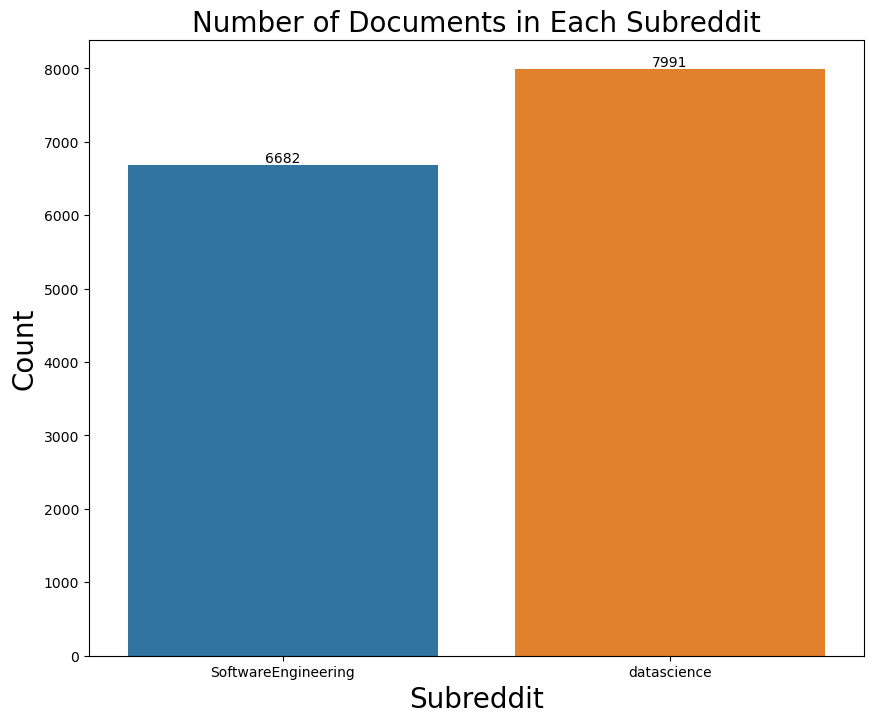

In [33]:
# Barchart of number of documents in each subreddit
plt.figure(figsize = (10, 8))
ax = sns.barplot(x = data.groupby('subreddit').size().index, y = data.groupby('subreddit').size().values)
ax.bar_label(ax.containers[0])
plt.xlabel('Subreddit', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title('Number of Documents in Each Subreddit', fontsize = 20)
plt.savefig(f'../graphs/number_of_documents.png');

In [34]:
# mean number of word_count for each subreddit
data.groupby('subreddit').agg({'word_count': 'mean'})

,word_count
subreddit,
SoftwareEngineering,27.728225
datascience,45.423602


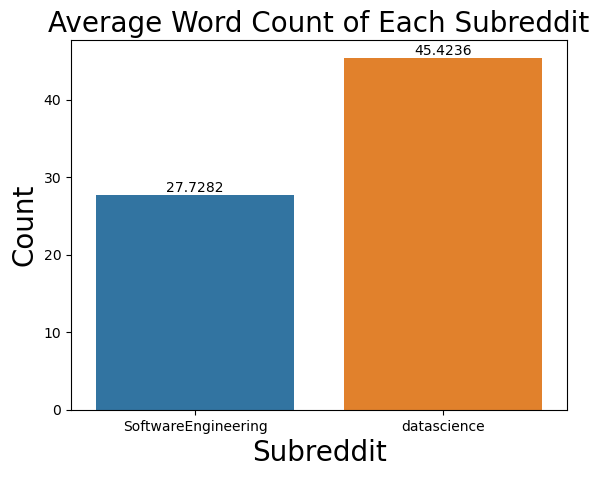

In [35]:
ax = sns.barplot(y = data.groupby('subreddit').agg({'word_count': 'mean'}).word_count, x = data.groupby('subreddit').agg({'word_count': 'mean'}).index)
ax.bar_label(ax.containers[0])
plt.xlabel('Subreddit', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title('Average Word Count of Each Subreddit', fontsize = 20);

In [36]:
# mean number of length for each subreddit
data.groupby('subreddit').agg({'length': 'mean'})

,length
subreddit,
SoftwareEngineering,166.361269
datascience,270.688775


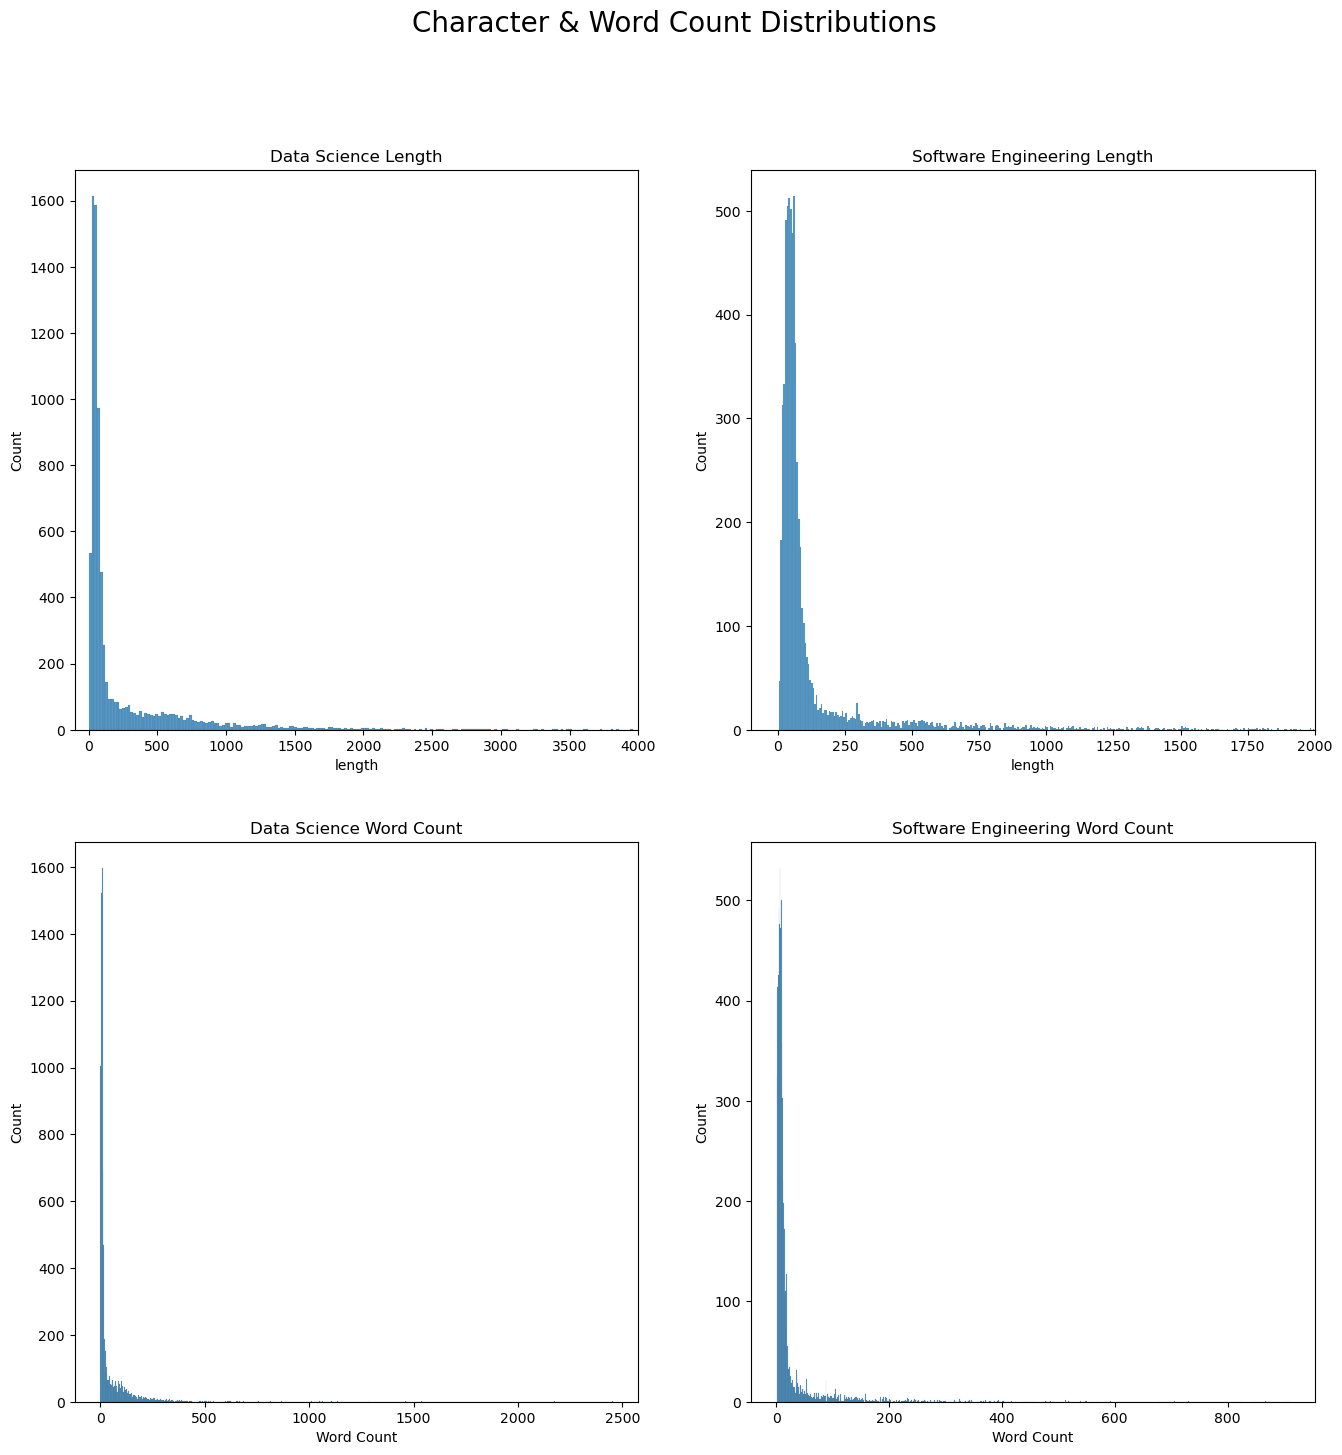

In [37]:
# Plot length and word count distributions by author
fig, ax = plt.subplots(2, 2, figsize = (16, 16))
sns.histplot(data[data['subreddit'] == 'datascience']['length'], ax = ax[0, 0])
sns.histplot(data[data['subreddit'] == 'SoftwareEngineering']['length'], ax = ax[0, 1])
sns.histplot(data[data['subreddit'] == 'datascience']['word_count'], ax = ax[1, 0])
sns.histplot(data[data['subreddit'] == 'SoftwareEngineering']['word_count'], ax = ax[1, 1])

ax[0, 0].set(xlabel = 'length', title = 'Data Science Length', xlim = [-100, 4000])
ax[0, 1].set(xlabel = 'length', title = 'Software Engineering Length', xlim = [-100, 2000])
ax[1, 0].set(xlabel = 'Word Count', title = 'Data Science Word Count')
ax[1, 1].set(xlabel = 'Word Count', title = 'Software Engineering Word Count')

fig.suptitle('Character & Word Count Distributions', fontsize = 20);

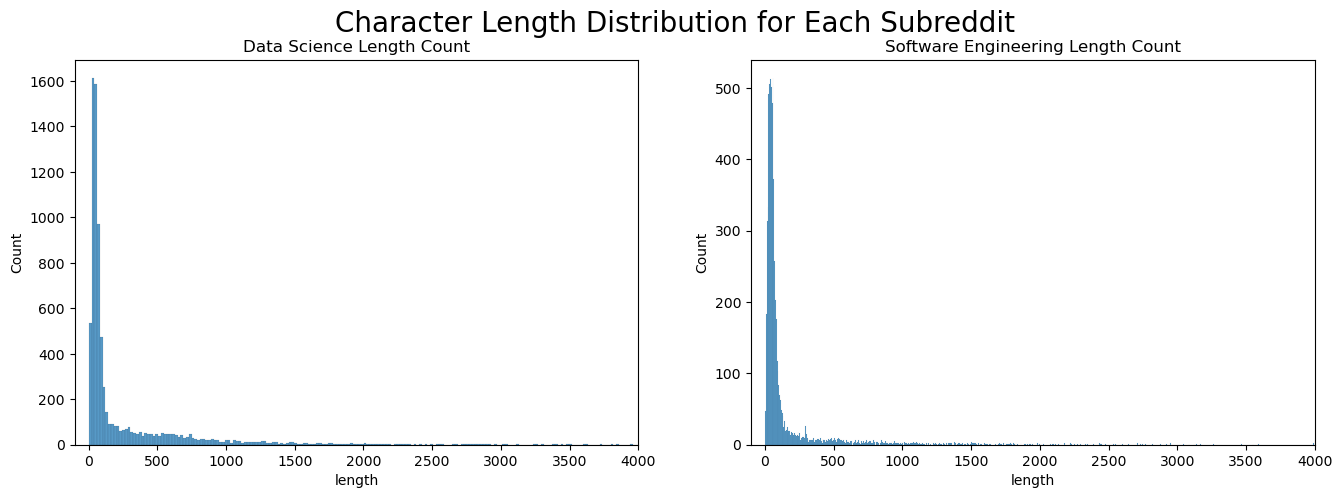

In [38]:
# Create clear distribution for length and word count
fig, ax = plt.subplots(1, 2, figsize = (16, 5))

sns.histplot(data[data['subreddit'] == 'datascience']['length'], ax = ax[0])
sns.histplot(data[data['subreddit'] == 'SoftwareEngineering']['length'], ax = ax[1])

ax[0].set(title = 'Data Science Length Count', xlim = [-100, 4000])
ax[1].set(title = 'Software Engineering Length Count', xlim = [-100, 4000])

fig.suptitle('Character Length Distribution for Each Subreddit', fontsize = 20);

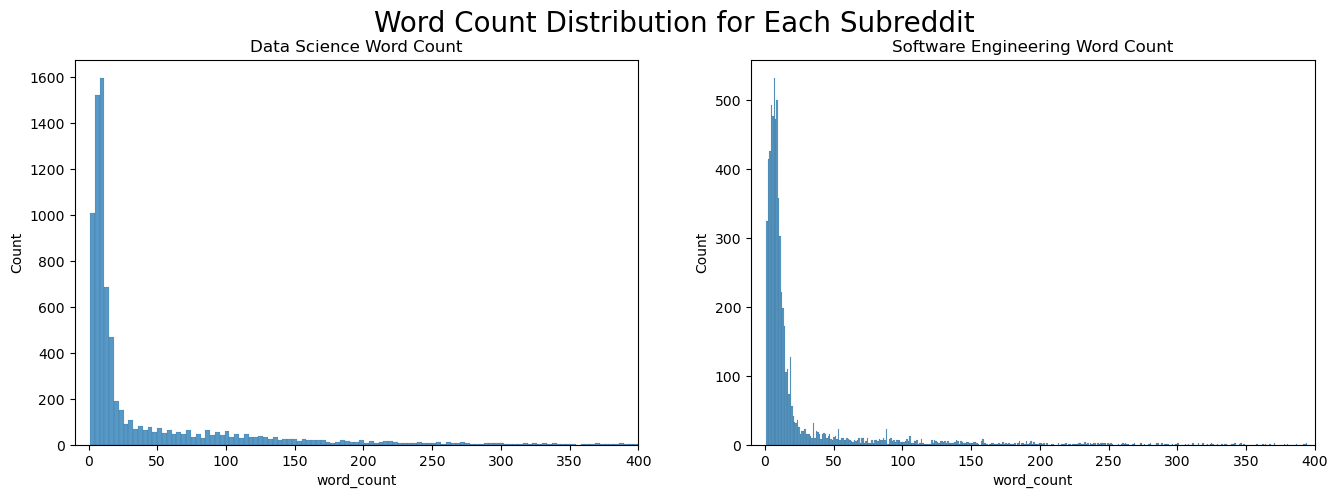

In [39]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))

sns.histplot(data[data['subreddit'] == 'datascience']['word_count'], ax = ax[0])
sns.histplot(data[data['subreddit'] == 'SoftwareEngineering']['word_count'], ax = ax[1])

ax[0].set(title = 'Data Science Word Count', xlim = [-10, 400])
ax[1].set(title = 'Software Engineering Word Count', xlim = [-10, 400])

fig.suptitle('Word Count Distribution for Each Subreddit', fontsize = 20);

In [40]:
data.to_csv('../data/data_cleaned.csv', index = False)